# Домашнее задание 5
---
## Практическое задание по теме “Элементы теории вероятностей”:

In [1]:
%matplotlib inline
 
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import factorial

import warnings
warnings.filterwarnings('ignore')

### №1

Напишите код, моделирующий выпадение поля в рулетке (с учетом поля зеро).

Выпадение поля от 0 до 36 включительно.

In [2]:
field = np.random.randint(0, 37)
field

29

### №2

**1)** Напишите код, проверяющий любую из теорем сложения или умножения вероятности на примере рулетки или подбрасывания монетки.

Выпадение какого либо числа в рулетке является независимым событием. Рассмотрим вероятность события выпадения 1, а затем 36. То есть под испытанием будем понимать двойной прокрут рулетки, а проверять теорему умножения вероятности.

Согласно теореме умножения: $P(AB) = P(A)*P(B)$

In [3]:
# Вероятность выпадения числа 1 (A):
p_1 = 1/37
# Вероятность выпадения числа 36 (B):
p_36 = 1/37

In [4]:
p_t = p_1*p_36
p_t

0.0007304601899196495

Эксперимент (1м испытаний):

In [5]:
n = 1000001
m = 0
exp = np.random.randint(0, 37, n)
for i in range(0, n-1):
    if exp[i] == 1:
        if exp[i+1] == 36:
            m+=1
p_e = m/(n-1)
print(f"Количество событий AB: {m}")
print(f"Количество испытаний: {n-1}")
print(f"Теоретическая вероятность: {round(p_t * 100, 5)}%")
print(f"Экспериментальная вероятность: {round(p_e * 100, 5)}%")

Количество событий AB: 758
Количество испытаний: 1000000
Теоретическая вероятность: 0.07305%
Экспериментальная вероятность: 0.0758%


Проверка теоремы сложения. Расчитаем вероятность события выпадения либо 1, либо 36.

Согласно теореме сложения: $P(A+B) = P(A)*P(B)$

In [6]:
n = 1000000
m = 0
exp = np.random.randint(0, 37, n)
for i in range(0, n-1):
    if exp[i] == 1 or exp[i] == 36:
            m+=1
p_e = m/(n)
p_t = p_1 + p_36
print(f"Количество событий AB: {m}")
print(f"Количество испытаний: {n}")
print(f"Теоретическая вероятность: {round(p_t * 100, 5)}%")
print(f"Экспериментальная вероятность: {round(p_e * 100, 5)}%")

Количество событий AB: 54187
Количество испытаний: 1000000
Теоретическая вероятность: 5.40541%
Экспериментальная вероятность: 5.4187%


**2)** Сгенерируйте десять выборок случайных чисел х0, …, х9 и постройте гистограмму распределения случайной суммы  +х0+ …+х9.

In [7]:
# количество элементов в одной выборке
n = 100
# количество выборок
k = 10
x = np.random.random_sample((k,n))

In [8]:
sum_x = []
for i in range(0, n):
    number = 0
    for j in range(0, k):
        number += np.random.choice(x[j])
    sum_x = np.append(sum_x, number)

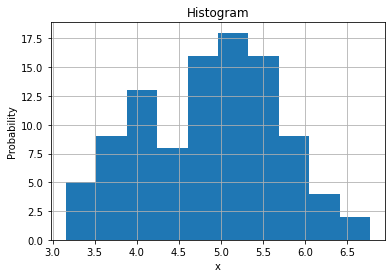

In [9]:
num_bins = 10
n, bins, patches = plt.hist(sum_x, num_bins)
plt.xlabel('x')
plt.ylabel('Probability')
plt.title('Histogram')
plt.grid()
plt.show()

### №3

**1)** Дополните код Монте-Карло последовательности независимых испытаний расчетом соответствующих вероятностей (через биномиальное распределение) и сравните результаты.

Методом Монте-Карло и с помощью биноминального распределения оцениваем с какой вероятностью при 4 испытаниях выпадет 2 орла и 2 решки.

In [10]:
k = 2
n = 4

success, amount = 0, 100000
a = np.random.randint(0,2,amount)
b = np.random.randint(0,2,amount)
c = np.random.randint(0,2,amount)
d = np.random.randint(0,2,amount)
x = a + b + c + d
for i in range(0, amount):
    if x[i] == k:
        success = success + 1

p_e = success / amount
# количество испытаний = 4, количество успехов = 2 
p_t = factorial(n)/factorial(k)/factorial(n-k)/(2**n)      
        
print(f"Количество успешных событий: {success}")
print(f"Количество испытаний: {amount}")
print(f"Экспериментальная вероятность: {round(p_e * 100, 3)}%")
print(f"Теоретическая вероятность (через биноминальное распределение): {round(p_t * 100, 3)}%")

Количество успешных событий: 37655
Количество испытаний: 100000
Экспериментальная вероятность: 37.655%
Теоретическая вероятность (через биноминальное распределение): 37.5%


Разница между экспериментальным значением и значением, полученным с помощью формулы Бернулли, разнится в зависимости от объема экспериментальной выборки. Чем она больше, тем ближе экспериментальный результат к расчитанному теоретически.

**2)** Повторите расчеты биномиальных коэффициентов и вероятностей k успехов в последовательности из n независимых испытаний, взяв другие значения n и k.

Методом Монте-Карло и с помощью биноминального распределения оцениваем с какой вероятностью при 7 испытаниях выпадет 4 орла и 3 решки.

In [11]:
k = 4
n = 7

success, amount = 0, 10000
a = np.random.randint(0,2,amount)
b = np.random.randint(0,2,amount)
c = np.random.randint(0,2,amount)
d = np.random.randint(0,2,amount)
e = np.random.randint(0,2,amount)
f = np.random.randint(0,2,amount)
g = np.random.randint(0,2,amount)
x = a + b + c + d + e + f + g
for i in range(0, amount):
    if x[i] == k:
        success = success + 1

p_e = success / amount
p_t = factorial(n)/factorial(k)/factorial(n-k)/(2**n)      
        
print(f"Количество успешных событий: {success}")
print(f"Количество испытаний: {amount}")
print(f"Экспериментальная вероятность: {round(p_e * 100, 3)}%")
print(f"Теоретическая вероятность (через биноминальное распределение): {round(p_t * 100, 3)}%")

Количество успешных событий: 2754
Количество испытаний: 10000
Экспериментальная вероятность: 27.54%
Теоретическая вероятность (через биноминальное распределение): 27.344%


Методом Монте-Карло и с помощью биноминального распределения оцениваем с какой вероятностью при 5 испытаниях выпадет 0 орлов и 5 решек.

In [12]:
k = 0
n = 5

success, amount = 0, 100
a = np.random.randint(0,2,amount)
b = np.random.randint(0,2,amount)
c = np.random.randint(0,2,amount)
d = np.random.randint(0,2,amount)
e = np.random.randint(0,2,amount)
x = a + b + c + d + e 
for i in range(0, amount):
    if x[i] == k:
        success = success + 1

p_e = success / amount
p_t = factorial(n)/factorial(k)/factorial(n-k)/(2**n)      
        
print(f"Количество успешных событий: {success}")
print(f"Количество испытаний: {amount}")
print(f"Экспериментальная вероятность: {round(p_e * 100, 3)}%")
print(f"Теоретическая вероятность (через биноминальное распределение): {round(p_t * 100, 3)}%")

Количество успешных событий: 6
Количество испытаний: 100
Экспериментальная вероятность: 6.0%
Теоретическая вероятность (через биноминальное распределение): 3.125%


Разница между экспериментальным значением и значением, полученным с помощью формулы Бернулли, разнится в зависимости от объема экспериментальной выборки. Чем она больше, тем ближе экспериментальный результат к расчитанному теоретически.

### №4 (Не обязательно)

Из урока по комбинаторике повторите расчеты, сгенерировав возможные варианты перестановок для других значений n и k.

In [13]:
import itertools
from scipy.special import factorial

Размещение $A_{n}^m = \frac{n!}{(n-m)!}$

In [14]:
var = '0123'
m = 3
n = len(var)

count = 0 
for p in itertools.permutations(var, m):
    print(''.join(p))
    count += 1
    
print(f"Calculate: {factorial(n)/factorial(n-m)}")    
print(f"Count: {count}")  

012
013
021
023
031
032
102
103
120
123
130
132
201
203
210
213
230
231
301
302
310
312
320
321
Calculate: 24.0
Count: 24


Сочетание $C_{n}^k = \frac{n!}{k!(n-k)!}$

In [15]:
var = '01234567'
k = 2
n = len(var)

count = 0 
for p in itertools.combinations(var, k):
    print(''.join(p))
    count += 1
    
print(f"Calculate: {factorial(n)/factorial(k)/factorial(n-k)}")    
print(f"Count: {count}")  

01
02
03
04
05
06
07
12
13
14
15
16
17
23
24
25
26
27
34
35
36
37
45
46
47
56
57
67
Calculate: 28.0
Count: 28


Комбинации $n^k$, где $n$ - из скольки элементов, $k$ - по скольки элементам.

In [16]:
var = '012'
n = len(var)
k = 4
count = 0 
for p in itertools.product(var, repeat=k):
    print(''.join(p))
    count += 1

print(f"Calculate: {n**k}")
print(f"Count: {count}") 

0000
0001
0002
0010
0011
0012
0020
0021
0022
0100
0101
0102
0110
0111
0112
0120
0121
0122
0200
0201
0202
0210
0211
0212
0220
0221
0222
1000
1001
1002
1010
1011
1012
1020
1021
1022
1100
1101
1102
1110
1111
1112
1120
1121
1122
1200
1201
1202
1210
1211
1212
1220
1221
1222
2000
2001
2002
2010
2011
2012
2020
2021
2022
2100
2101
2102
2110
2111
2112
2120
2121
2122
2200
2201
2202
2210
2211
2212
2220
2221
2222
Calculate: 81
Count: 81


### №5 (Не обязательно)

Дополните код расчетом коэффициента корреляции $x$ и $y$ по формуле:


$R = \frac{\sum(x_i-x_m)(y_i-y_m)}{\sqrt{\sum(x_i-x_m)^2\sum(y_i-y_m)^2}}$

Коэффициент корреляции R:
	Вручную:                    R=0.93799650881594
	С помощью библиотеки numpy: R=0.9379965088159399

Параметры линейной регрессии a,b:
	Вручную:                    a=0.7272050560643353, b=0.1304861870892838
	С помощью библиотеки numpy: a=0.7272050560643353, b=0.130486187089284


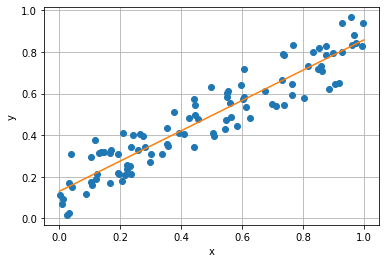

In [17]:
n = 100
r = 0.7
x = np.random.rand(n)
y = r*x + (1 - r)*np.random.rand(n)
plt.plot(x, y, 'o')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)

# Расчет коэффициента корреляции
x_mean = np.mean(x)
y_mean = np.mean(y)

R = (np.sum((x - x_mean) * (y - y_mean))) / (np.sqrt(np.sum((x - x_mean)**2) * np.sum((y - y_mean)**2)))
R1 = np.corrcoef(x, y)[0][1]

print("Коэффициент корреляции R:")
print(f"\tВручную:                    R={R}")
print(f"\tС помощью библиотеки numpy: R={R1}")

# Расчет параметров линейной регрессии a,b:
a = (np.sum(x)*np.sum(y) - n*np.sum(x*y))/(np.sum(x)*np.sum(x) - n*np.sum(x*x))
b = (np.sum(y) - a*np.sum(x))/n

A = np.vstack([x, np.ones(len(x))]).T
a1, b1 = np.linalg.lstsq(A, y)[0]
print("\nПараметры линейной регрессии a,b:")
print(f"\tВручную:                    a={a}, b={b}")
print(f"\tС помощью библиотеки numpy: a={a1}, b={b1}")

plt.plot([0, 1], [b, a + b])
plt.show()